# 포인터를 이용한 연결리스트


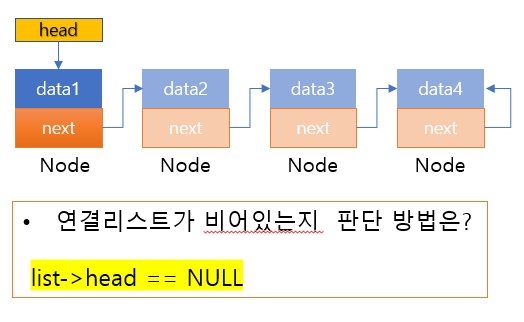  
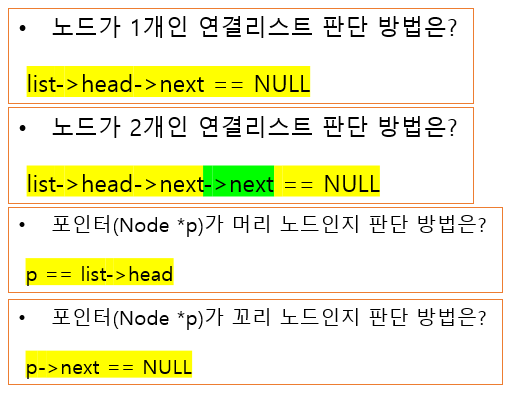

In [ ]:
#include <stdio.h>
#include <stdlib.h>
typedef struct {
    int no;
    char name[20];
} Member;
typedef struct __node{
    Member data;
    struct __node *next;  // 자기 참조형(self referential)                  
} Node;
// 멤버 추가
Member AddMember(const char *msg){
    Member tmp;
    printf("%s 멤버 입력\n", msg);
    printf("○ 번호: ");scanf("%d",&tmp.no);
    printf("○ 이름: ");scanf("%s",tmp.name);
    return tmp;
}
//연결리스트 
typedef struct {
    Node *head;
    Node *cur;
} List;
//노드를 동적으로 생성
static Node *AllocNode(void){
    return (Node *)calloc(1, sizeof(Node));
}
//연결리스트 초기화
void Initialize(List *list){
    list->head = NULL;
    list->cur = NULL;
}
static void SetNode(Node *n, Member *x, Node *next){
    n->data = *x; 
    n->next = next;
}
//현재노드앞에 노드추가
void InsertFront(List *list, Member *x){
    Node *ptr  = list->head;
    list->head = list->cur = AllocNode();
    SetNode(list->head, x, ptr); 
}
//꼬리에 노드 추가
void InsertRear(List *list, Member *x){
    if(list->head == NULL) InsertFront(list,x);
    else{
        Node *ptr = list->head;
        while(ptr->next != NULL) ptr = ptr->next; //맨 뒤로 이동       
        ptr->next = list->cur = AllocNode();
        SetNode(ptr->next, x, NULL);
    }
}        
//출력함수
void Print(List *list){
    if(list->head == NULL){
        printf("노드 없음");
    }else{
        Node *ptr = list->head;
        printf("■ 모두 보기\n");
        while(ptr != NULL){
            printf("%d : %s\n", ptr->data.no, ptr->data.name);
            ptr = ptr->next;
        }
    }
}
void Terminate(List *list){
    while(list->head != NULL){
        Node *ptr = list->head->next;
        free(list->head);
        list->head = list->cur = ptr;
    }
}    
//Start Function
int main(){    
    List list;
    Initialize(&list);
    Member x;
    //첫번째 멤버 입력
    x = AddMember("첫번째");
    InsertFront(&list, &x);
    //두번째 멤버 입력
    x = AddMember("두번째");
    InsertRear(&list, &x);
    //세번째 멤버 입력
    x = AddMember("세번째");
    InsertRear(&list, &x);
    Print(&list);

    //회원 찾기     
        
    


    Terminate(&list);
}




# 연결리스트 
- 멤버 삭제 함수 추가
- 회원 정보 :: Member ScanMember(const char *msg)
- 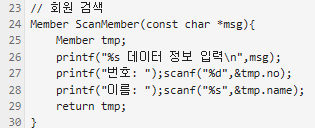  
- 회원노드 검색 함수 :: Node *search(List *list, Member *x)  
-  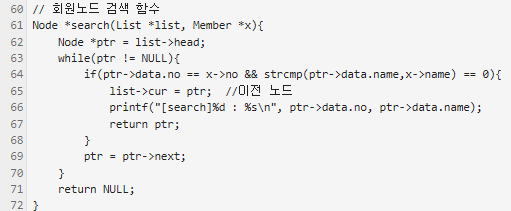
-  회원삭제 함수: void RemoveMember(List *list, Member *x)
-  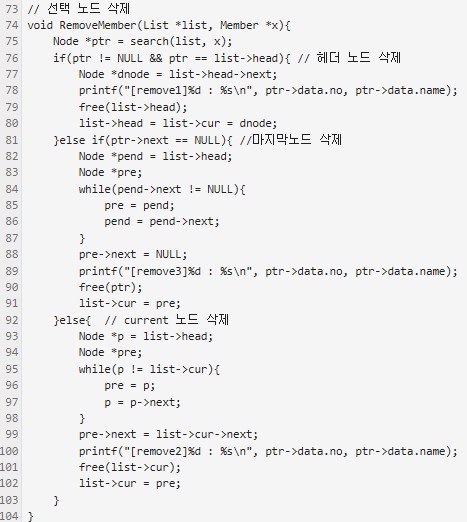  

In [76]:
#include <stdio.h>
#include <stdlib.h>
typedef struct {
    int no;
    char name[20];
} Member;
typedef struct __node{
    Member data;
    struct __node *next;  // 자기 참조형(self referential)                  
} Node;
typedef struct { //연결리스트 
    Node *head;
    Node *cur;
} List;
// 멤버 추가
Member AddMember(const char *msg){
    Member tmp;
    printf("%s 멤버 입력\n", msg);
    printf("○ 번호: ");scanf("%d",&tmp.no);
    printf("○ 이름: ");scanf("%s",tmp.name);
    return tmp;
}
// 회원 검색
Member ScanMember(const char *msg){
    Member tmp;
    printf("%s 데이터 정보 입력\n",msg);
    printf("번호: ");scanf("%d",&tmp.no);
    printf("이름: ");scanf("%s",&tmp.name);
    return tmp;
}
//노드를 동적으로 생성
static Node *AllocNode(void){
    return (Node *)calloc(1, sizeof(Node));
}
//연결리스트 초기화
void Initialize(List *list){
    list->head = NULL;
    list->cur = NULL;
}
static void SetNode(Node *n, Member *x, Node *next){
    n->data = *x; 
    n->next = next;
}
//현재노드앞에 노드추가
void InsertFront(List *list, Member *x){
    Node *ptr  = list->head;
    list->head = list->cur = AllocNode();
    SetNode(list->head, x, ptr); 
}
//꼬리에 노드 추가
void InsertRear(List *list, Member *x){
    if(list->head == NULL) InsertFront(list,x);
    else{
        Node *ptr = list->head;
        while(ptr->next != NULL) ptr = ptr->next; //맨 뒤로 이동       
        ptr->next = list->cur = AllocNode();
        SetNode(ptr->next, x, NULL);
    }
}  
// 회원노드 검색 함수 
Node *search(List *list, Member *x){
    Node *ptr = list->head;    
    while(ptr != NULL){
        if(ptr->data.no == x->no && strcmp(ptr->data.name,x->name) == 0){
            list->cur = ptr;  //이전 노드
            printf("[search]%d : %s\n", ptr->data.no, ptr->data.name); 
            return ptr;
        }
        ptr = ptr->next;
    }
    return NULL;
}
// 선택 노드 삭제
void RemoveMember(List *list, Member *x){
    Node *ptr = search(list, x);    
    if(ptr != NULL && ptr == list->head){ // 헤더 노드 삭제
        Node *dnode = list->head->next;
        printf("[remove1]%d : %s\n", ptr->data.no, ptr->data.name);
        free(list->head);
        list->head = list->cur = dnode;
    }else if(ptr->next == NULL){ //마지막노드 삭제
        Node *pend = list->head;
        Node *pre;
        while(pend->next != NULL){
            pre = pend;
            pend = pend->next;
        }
        pre->next = NULL;        
        printf("[remove3]%d : %s\n", ptr->data.no, ptr->data.name);
        free(ptr);
        list->cur = pre;
    }else{  // current 노드 삭제    
        Node *p = list->head;
        Node *pre;
        while(p != list->cur){
            pre = p;            
            p = p->next;                                
        }        
        pre->next = list->cur->next;    
        printf("[remove2]%d : %s\n", ptr->data.no, ptr->data.name);
        free(list->cur);
        list->cur = pre;
    }
}
//출력함수
void Print(List *list){
    if(list->head == NULL){
        printf("노드 없음");
    }else{
        Node *ptr = list->head;
        printf("■ 모두 보기\n");
        while(ptr != NULL){
            printf("%d : %s\n", ptr->data.no, ptr->data.name);
            ptr = ptr->next;
        }
    }
}
void Terminate(List *list){
    while(list->head != NULL){
        Node *ptr = list->head->next;
        free(list->head);
        list->head = list->cur = ptr;
    }
}    
//Start Function
int main(){    
    List list;
    Node *sdata;
    Initialize(&list);
    Member x;
    //첫번째 멤버 입력
    x = AddMember("첫번째");
    InsertFront(&list, &x);
    //두번째 멤버 입력
    x = AddMember("두번째");
    InsertRear(&list, &x);
    //세번째 멤버 입력
    x = AddMember("세번째");
    InsertRear(&list, &x);
    Print(&list);

    //회원 삭제     
    Member mem = ScanMember("삭제");        
    RemoveMember(&list, &mem);
    Print(&list);

    Terminate(&list);
}




첫번째 멤버 입력

○ 번호: 

 1


○ 이름: 

 aa


두번째 멤버 입력

○ 번호: 

 2


○ 이름: 

 bb


세번째 멤버 입력

○ 번호: 

 3


○ 이름: 

 cc


■ 모두 보기

1 : aa

2 : bb

3 : cc

삭제 데이터 정보 입력

번호: 

 2


이름: 

 bb


[search]2 : bb

[remove2]0x5588eb27af50 : 0x5588eb27af80

[remove2]2 : bb

■ 모두 보기

1 : aa

3 : cc

